# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

<a id='introduction'></a> 

# Support Vector Machine
A support vector machine, or SVM, is a machine learning technique widely used in data analysis and pattern recognition. SVM is a supervised learning model, which analyses data used for classification and regression analysis. A set of training examples is provided to the SVM algorithm, each belonging to one or the other categories. The algorithm builds a model that assigns new data (X to Y) into one of the categories that it
has learned about in the training phase. 

Consider the plots shown below. The graph on the left indicates the training data in space, the black coloured rings belong to one class, and the hollow rings belong to the second class. The SVM algorithm creates a hyperplane that divides this dataset into two parts so that when new data appears in space (depending on the side on which it appears), it will be classified into one of the classes. Points lying above the hyperplane will be classified as black rings and the ones lying below as hollow rings.

![alt text](https://d2a032ejo53cab.cloudfront.net/Glossary/w6ADcQcY/SVC.PNG "SVM")

There could be more than one hyperplane dividing the data space for making the classification. Given a particular hyperplane, we can compute the distance between the hyperplane and the closest data point. Intuitively, a large distance between the data point and hyperplane (also called margin) is considered optimal. 

We will not get into the SVM mathematics here, but for now, to understand the purpose and working of an SVM model, this would suffice to develop your SVM algorithm. You can learn more about support vector machine and their applications in trading from Trading With Machine Learning:<a href="https://quantra.quantinsti.com/course/trading-machine-learning-classification-svm" target="_blank"> Classification and SVM course on Quantra</a>.

In this notebook, you will perform the following steps:

1. [Import Libraries](#library)


2. [Independent and Dependent Variable](#variable)


3. [Support Vector Machine](#Model)


4. [Create Hyperplane](#plane)


5. [Plot Hyperplane](#plot)

## Import Libraries 

In [1]:
# Import numpy
import numpy as np

# Import matplotlib as an alias plt and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Import svm from sklearn
from sklearn import svm

<a id='variable'></a> 

## Dependent and Independent Variable
We will construct 40 separable points which will act as independent (X) and dependent/target (Y) variable.

In [2]:
# Create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2)-[2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
X[:3],Y[:3]

(array([[-0.23594765, -1.59984279],
        [-1.02126202,  0.2408932 ],
        [-0.13244201, -2.97727788]]), [0, 0, 0])

<a id='Model'></a> 

## Support Vector Machine
We will create a support vector classifier and fit the model.

In [3]:
# Fit the model
clf = svm.SVC(kernel="linear")
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

<a id='plane'></a> 

## Create Hyperplane

We will make a hyperplane or simply a 2D plane separating the output of the model and classify the variables. 

In [4]:
# Get the separating hyperplane

# Coefficient of the model
w = clf.coef_[0]  

# Slope of the model
a = -w[0] / w[1]  

# Define the X coordinate
xx = np.linspace(-5, 5) 

# Calculate the Y coordinate
yy = a * xx - (clf.intercept_[0]) / w[1] 

xx,yy

(array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
        -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
        -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
        -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
        -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
         0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
         1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
         2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
         3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
         4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ]),
 array([ 7.32169617,  7.03761852,  6.75354087,  6.46946322,  6.18538558,
         5.90130793,  5.61723028,  5.33315263,  5.04907498,  4.76499733,
         4.48091969,  4.19684204,  3.91276439,  3.62868674,  3.34460909,
         3.06053144,  2.7764538 ,  2.49237615,  2

#### Construct the Upper and Lower Plane

We will construct an upper and lower plane to separate hyperplane that passes through the support vectors.

In [5]:
# Construct the upper plane
b = clf.support_vectors_[0]    
yy_down = a * xx + (b[1] - a * b[0]) 
yy_down

array([ 5.77921879,  5.49514114,  5.2110635 ,  4.92698585,  4.6429082 ,
        4.35883055,  4.0747529 ,  3.79067526,  3.50659761,  3.22251996,
        2.93844231,  2.65436466,  2.37028701,  2.08620937,  1.80213172,
        1.51805407,  1.23397642,  0.94989877,  0.66582113,  0.38174348,
        0.09766583, -0.18641182, -0.47048947, -0.75456712, -1.03864476,
       -1.32272241, -1.60680006, -1.89087771, -2.17495536, -2.45903301,
       -2.74311065, -3.0271883 , -3.31126595, -3.5953436 , -3.87942125,
       -4.16349889, -4.44757654, -4.73165419, -5.01573184, -5.29980949,
       -5.58388714, -5.86796478, -6.15204243, -6.43612008, -6.72019773,
       -7.00427538, -7.28835302, -7.57243067, -7.85650832, -8.14058597])

In [6]:
# Construct the lower plane
b = clf.support_vectors_[-1]  
yy_up = a * xx + (b[1] - a * b[0])
yy_up

array([ 8.86428014,  8.58020249,  8.29612484,  8.0120472 ,  7.72796955,
        7.4438919 ,  7.15981425,  6.8757366 ,  6.59165896,  6.30758131,
        6.02350366,  5.73942601,  5.45534836,  5.17127071,  4.88719307,
        4.60311542,  4.31903777,  4.03496012,  3.75088247,  3.46680482,
        3.18272718,  2.89864953,  2.61457188,  2.33049423,  2.04641658,
        1.76233894,  1.47826129,  1.19418364,  0.91010599,  0.62602834,
        0.34195069,  0.05787305, -0.2262046 , -0.51028225, -0.7943599 ,
       -1.07843755, -1.36251519, -1.64659284, -1.93067049, -2.21474814,
       -2.49882579, -2.78290344, -3.06698108, -3.35105873, -3.63513638,
       -3.91921403, -4.20329168, -4.48736933, -4.77144697, -5.05552462])

<a id='plot'></a> 

## Plot Hyperplane

We will plot the hyperplane, the data points, and the nearest vectors to the planes.

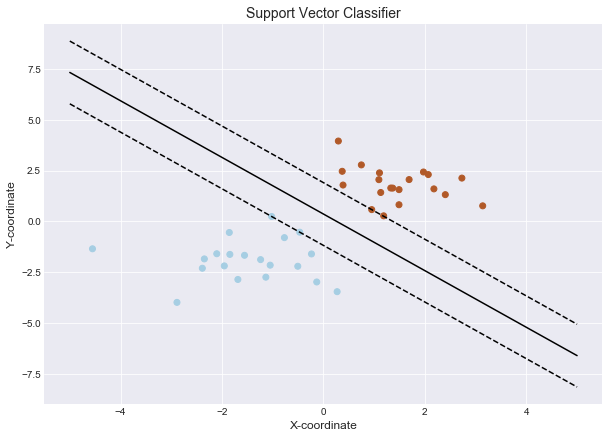

In [7]:
plt.figure(figsize=(10,7))

# Separating hyperplane
plt.plot(xx, yy,'k-')        
# Lower boundary
plt.plot(xx, yy_down, 'k--') 
# Upper boundary
plt.plot(xx, yy_up,'k--')   
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors="none") 
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('Support Vector Classifier', fontsize=14)
plt.xlabel('X-coordinate', fontsize=12)
plt.ylabel('Y-coordinate', fontsize=12)
plt.show()

The above figure shows the classification of the data points in separate hyperplane.<br><br>